# **Estimating parameters**

In [ ]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st




In [ ]:
df = pd.read_excel(r'/content/sample_data/Sheet-Data.xlsx')
print(df)
print(df.head())

      Data
0       75
1       80
2       20
3       45
4       42
...    ...
1316    60
1317    30
1318    25
1319    10
1320    50

[1321 rows x 1 columns]
   Data
0    75
1    80
2    20
3    45
4    42


(array([  8.,   0.,   8.,   3.,   1.,  35.,   3.,  22.,   7.,   8.,  75.,
         23.,  35.,  20.,  11., 129.,  32.,  32.,  26.,  11., 155.,  34.,
         31.,  38.,  11., 129.,  27.,  32.,  20.,   5., 103.,  11.,  22.,
         16.,   2.,  59.,  12.,   8.,  16.,   1.,  53.,   7.,   7.,   9.,
          0.,  12.,   1.,   3.,   3.,   5.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 50 artists>)

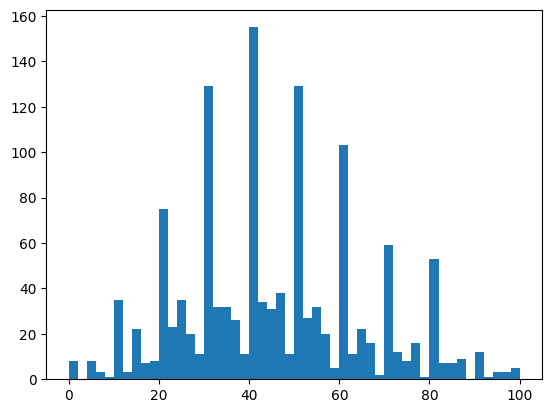

In [ ]:
plt.hist(df['Data'],bins=50)

There are almost 1321 samples of data.

# **Fitting gamma distribution**

Method of moments
Let m1 and m2 be the first and second moments of the samples.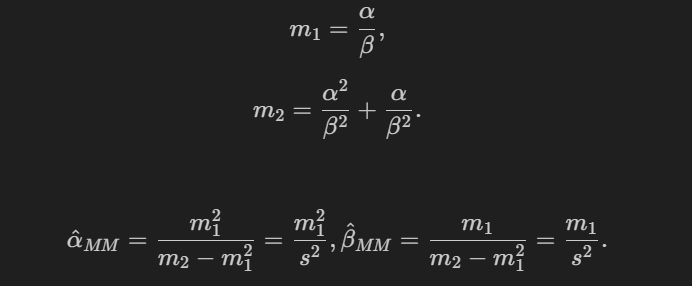

In [ ]:
x = np.array(df['Data'])
m1 = np.average(x)
ss = np.var(x)
print('sample mean:',m1)
print('sample variance:',ss)

sample mean: 45.02800908402725
sample variance: 395.8637120847018


In [ ]:
alphaMM = m1*m1/ss
betaMM = m1/ss
print('alphaMM value',alphaMM)
print('betaMM value',betaMM)

alphaMM value 5.1217667600646815
betaMM value 0.11374624071223974


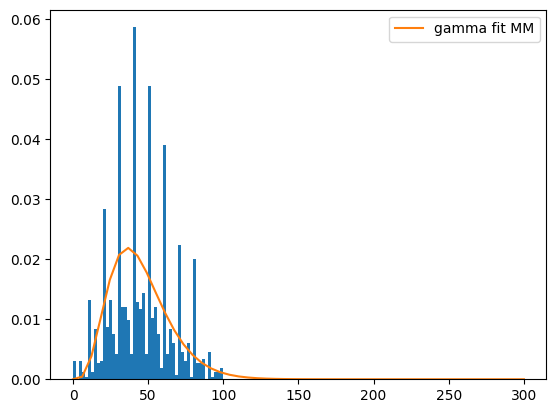

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(x,density=True,bins=50)
xx = np.linspace(0,300,50)
ax.plot(xx, st.gamma.pdf(xx,alphaMM,scale=1/betaMM),label='gamma fit MM')
ax.legend(loc='best')
plt.show()

The above mentioned code snippet uses the matplotlib.pyplot and scipy.stats libraries to create a histogram and overlay a gamma distribution fit on the histogram data.

'ax.plot(xx, st.gamma.pdf(xx, alphaMM, scale=1/betaMM), label='gamma fit MM'):
'This line plots the probability density function (PDF) of the gamma distribution with parameters alphaMM and betaMM over the range specified by 'xx'.

# **Bootstrap**


It follows a monte carlo simulation approach to find the metrics like bias, variance and confidence intervals for estimators.

Here, we are Simulating a process to estimate parameters for a gamma distribution using the method of moments.

In [ ]:
N = 1000
n = 1321
alpha_hat = np.zeros(N)
beta_hat = np.zeros(N)
for i in np.arange(N):
  xi = st.gamma.rvs(alphaMM,scale=1/betaMM,size=n)
  m1i = np.average(xi); ssi = np.var(xi)
  alpha_hat[i] = m1i*m1i/ssi; beta_hat[i] = m1i/ssi



(array([ 0.52218499,  5.22184994, 19.58193726, 63.44547673, 77.28337906,
        61.09564426, 24.02050971,  7.83277491,  1.82764748,  0.2610925 ]),
 array([0.09659997, 0.10043003, 0.10426009, 0.10809015, 0.11192021,
        0.11575027, 0.11958033, 0.12341039, 0.12724045, 0.13107051,
        0.13490057]),
 <BarContainer object of 10 artists>)

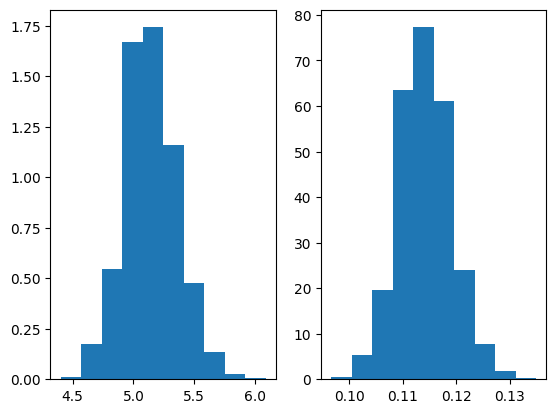

In [ ]:
ax1 = plt.subplot(121)
ax1.hist(alpha_hat,density=True)
ax2 = plt.subplot(122)
ax2.hist(beta_hat,density=True)

To get the histogram plots of the arrays alpha_hat and beta_hat

In [ ]:
print(np.sqrt(np.var(alpha_hat)))
print(np.sqrt(np.var(beta_hat)))

0.21767296264876193
0.004969203396894773


Standard deviation is a measure of the amount of variation or dispersion in a set of values. The above snippet calculates the standard deviation of the arrays 'alpha_hat' and 'beta_hat'.

# **Confidence Interval**

In [ ]:
del1 = np.percentile(alpha_hat - alphaMM, 97.5)
del2 = np.percentile(alpha_hat - alphaMM, 2.5)
print([del1, del2])

[0.48000067589098927, -0.4033229044688878]


This code calculates the 95% confidence interval for the parameter alphaMM by computing percentiles of the differences between the simulated estimates (alpha_hat) and the true value (alphaMM).

# **Maximum Likelihood**

Likelihood function for Maximum Likelihood Estimation (MLE) of a parameter 'a' in a gamma distribution.

In [ ]:
# Replace non-positive values with a small positive value
x_positive = np.maximum(x, 1e-10)

# Calculate the log mean
lm1 = np.average(np.log(x_positive))

# Define the log-likelihood function
fML = lambda a: (np.log(a) - digamma(a) - np.log(lm1) + lm1)

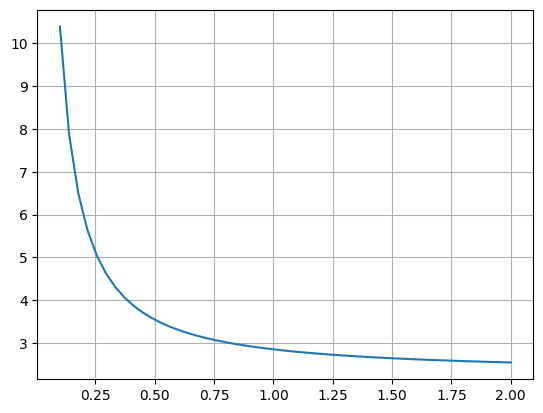

In [ ]:
fig, ax = plt.subplots(1,1)

xx = np.linspace(0.1,2,50)
ax.plot(xx,fML(xx))
ax.grid(True)
plt.show()

In [ ]:
import scipy.optimize as sopt

# Define the log-likelihood function
fML = lambda a: (np.log(a) - digamma(a) - np.log(lm1) + lm1)

# Use root_scalar to find the root (solution)
#sol = sopt.root_scalar(fML, bracket=[0.1, 2])
#sol = sopt.root_scalar(fML, bracket=[0.1, 5])

bracket = [0.1, 5]
# Check the signs at the bracket endpoints
print(f"f({bracket[0]}): {fML(bracket[0])}")
print(f"f({bracket[1]}): {fML(bracket[1])}")






f(0.1): 10.39508801375911
f(5): 2.377238410344381
